# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Import Dataset

In [2]:
df = pd.read_csv('data/house_price.csv', index_col= 'ID')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df = df.rename(columns= {'black': 'b'})

# 3. Exploratory Data Analysis (EDA)

### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  b        333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [5]:
df.shape

(333, 14)

###  Check Missing Value

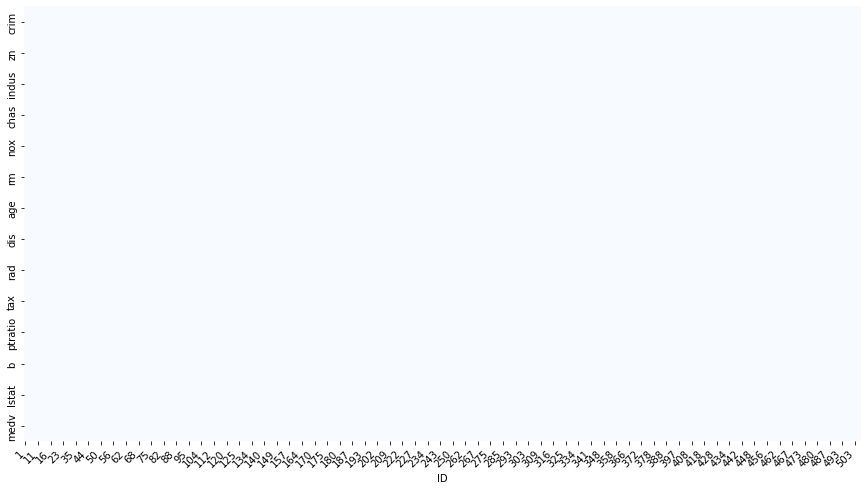

In [6]:
plot_missing_value(df)

`The dataset is clean from missing value`

### Data Description

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


## A. Numerical Features

### Target Variable Distribution

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

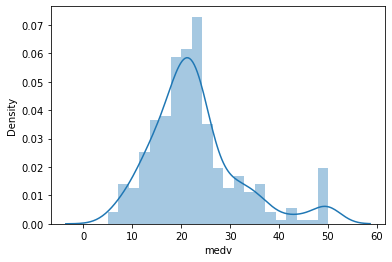

In [8]:
sns.distplot(df['medv'], kde = True)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

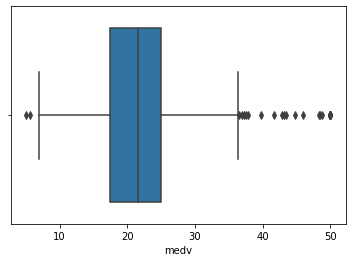

In [9]:
sns.boxplot(df['medv'])

### Numeric Variable Distribution

In [10]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

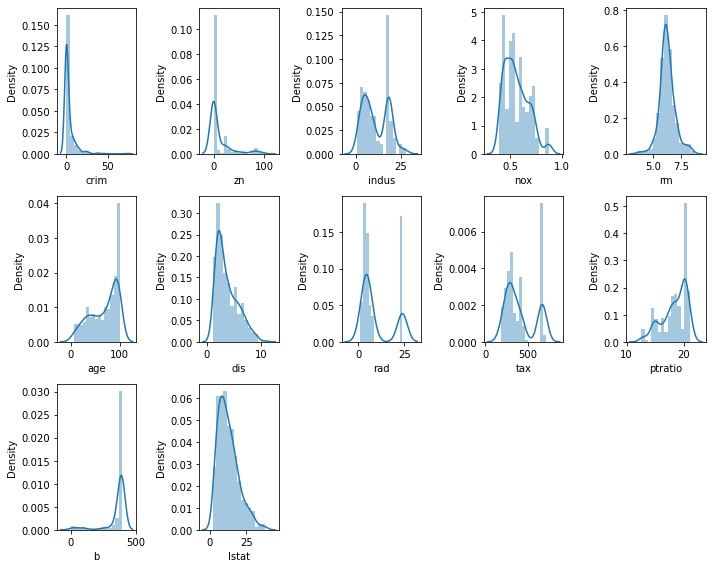

In [11]:
numeric = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
           'ptratio', 'b', 'lstat']

x = plt.figure(figsize=(10, 8))

for i, j in enumerate(numeric):
    x.add_subplot(3, 5, i+1)
    sns.distplot(df[j], bins=15)
    x.tight_layout()

plt.tight_layout()

`Although several columns have a skew, I don't handle it because maybe the number of value supposed to be. But, if the model has higher value of error, I'll handle that in the evaluation part.`

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

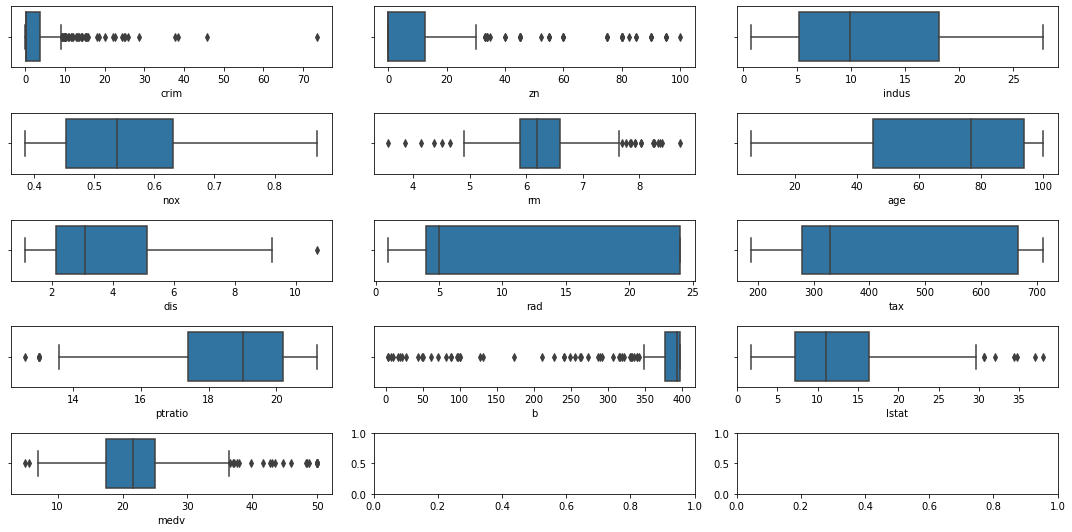

In [12]:
fig, axs = plt.subplots(5,3, figsize = (15,7.5))
sns.boxplot(df['crim'], ax = axs[0,0])
sns.boxplot(df['zn'], ax = axs[0,1])
sns.boxplot(df['indus'], ax = axs[0,2])
sns.boxplot(df['nox'], ax = axs[1,0])
sns.boxplot(df['rm'], ax = axs[1,1])
sns.boxplot(df['age'], ax = axs[1,2])
sns.boxplot(df['dis'], ax = axs[2,0])
sns.boxplot(df['rad'], ax = axs[2,1])
sns.boxplot(df['tax'], ax = axs[2,2])
sns.boxplot(df['ptratio'], ax = axs[3,0])
sns.boxplot(df['b'], ax = axs[3,1])
sns.boxplot(df['lstat'], ax = axs[3,2])
sns.boxplot(df['medv'], ax = axs[4,0])


plt.tight_layout()
plt.show()

`Despite of many columns have outliers, I don't handle them yet because the values might supposed to be like that. But, if the model has higher value of error, I’ll handle in the evaluation part`

## Correlation Matrix

In [13]:
from jcopml.plot import plot_correlation_matrix

In [14]:
plot_correlation_matrix(df,target_col='medv', numeric_col='auto')

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

`Because Github can't display the correlation plot, I've captured a picture of it.`

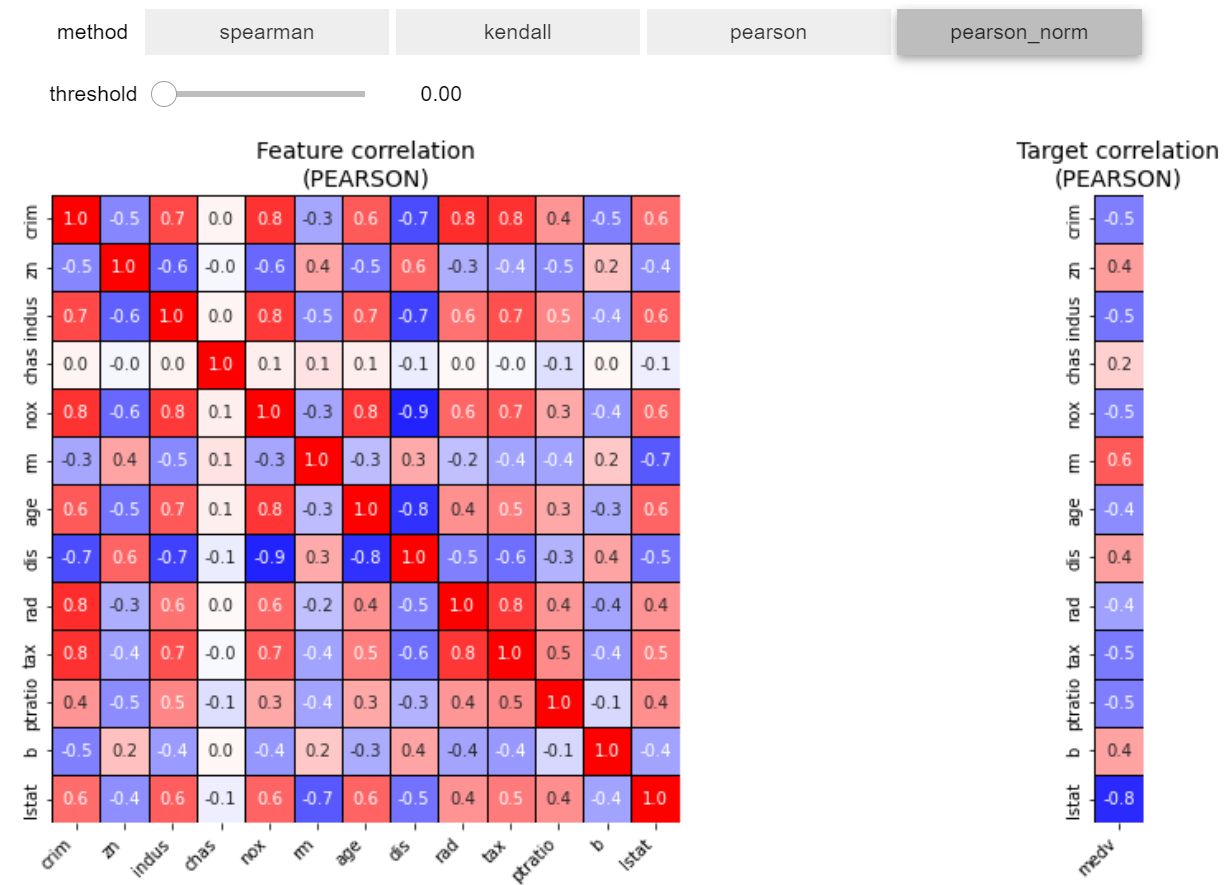

`The plot of the correlation matrix explains several columns have a strong positive and negative correlation on the target variable by using Pearson normalization. I set a threshold is 0.5`

**Positive Correlation**
1. rm

**Negatvie Correlation**
1. crim
2. indus
3. tax
4. ptratio
5. lstat

## Positive Correlation

### rm vs medv

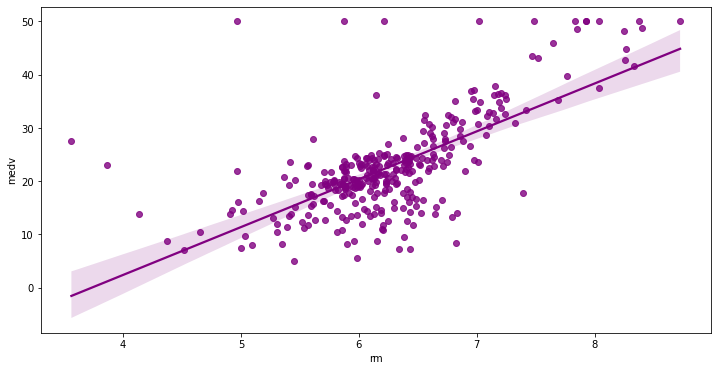

In [15]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='rm', y = 'medv', color= 'purple', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## Negative Correlation

### crim vs medv

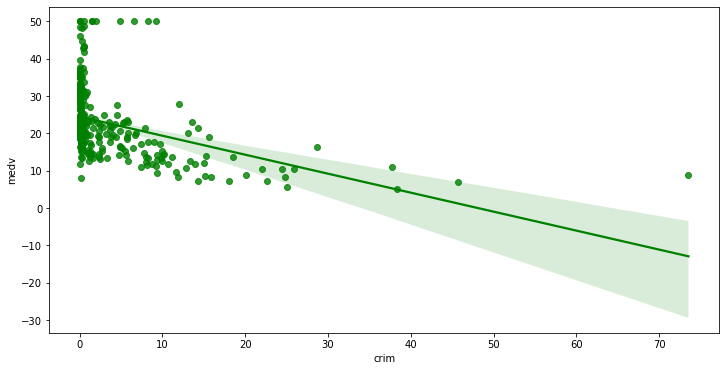

In [16]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='crim', y = 'medv', color= 'g', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### indus vs medv

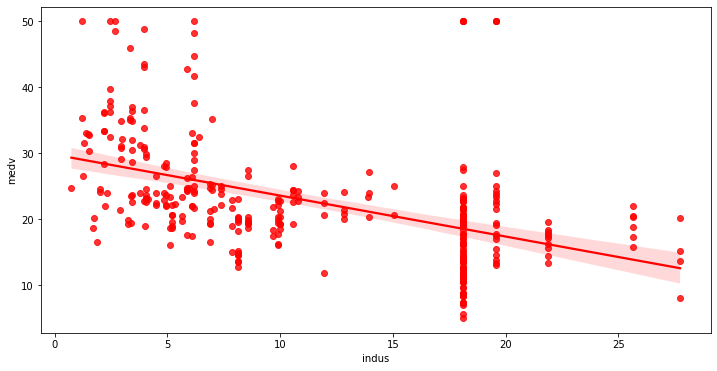

In [17]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='indus', y = 'medv', color= 'r', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### tax vs medv

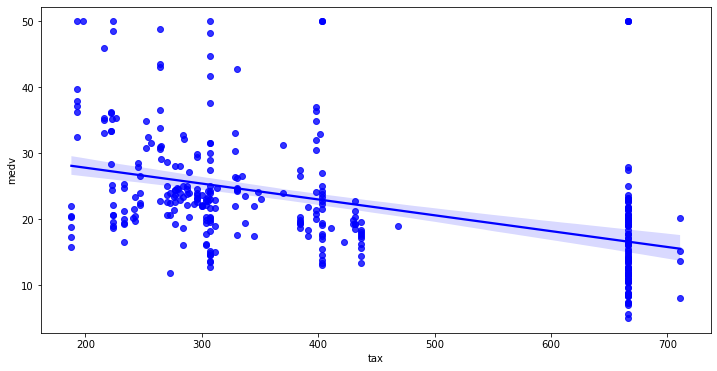

In [18]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='tax', y = 'medv', color= 'b', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### ptratio vs medv

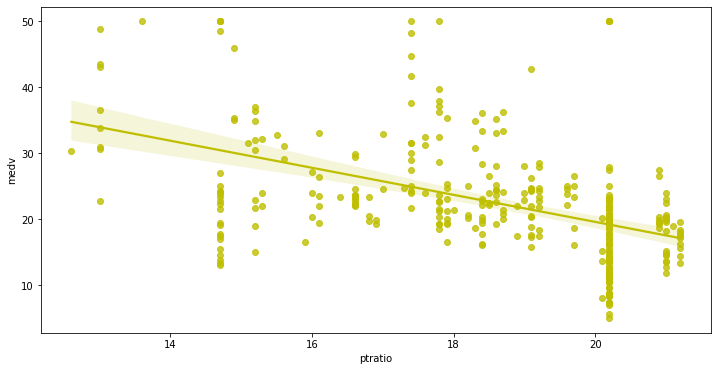

In [19]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='ptratio', y = 'medv', color= 'y', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### lstat vs medv

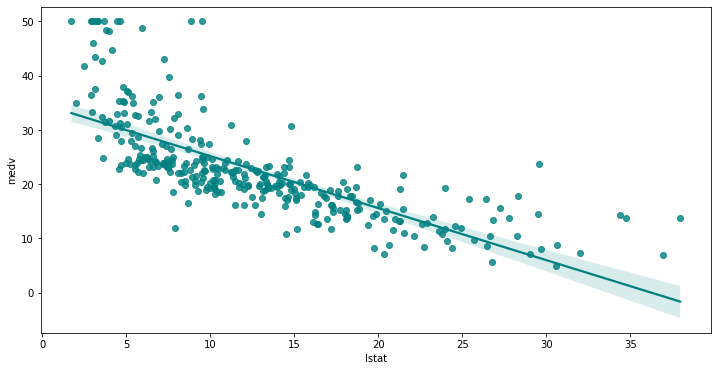

In [20]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='lstat', y = 'medv', color= 'teal', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## B. Categorical Features

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chas', ylabel='count'>

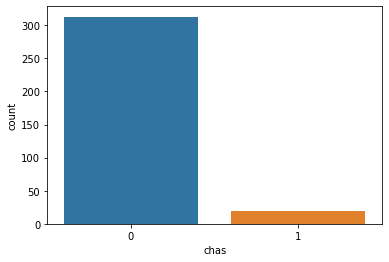

In [21]:
sns.countplot('chas', data = df)

**Insight**

`1. More houses not crossed by the charles river` <br>

# 4. Dataset Splitting

In [22]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [23]:
X = df.drop(columns="medv")
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

# 5. Modeling

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.impute import SimpleImputer

In [25]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [26]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__max_depth': 59, 'algo__max_features': 0.9411525976057389, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 115}
0.978510650725248 0.8362447802993256 0.9173480283101261


# 6. Feature Importance

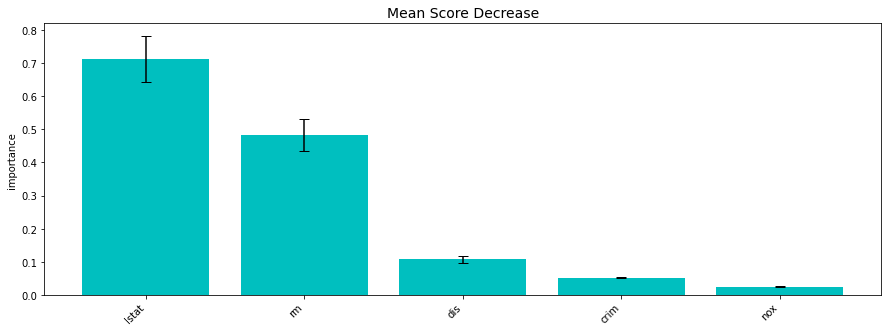

In [27]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=5)

`Lower status of population have a higher influence for house price in Boston.`

In [28]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['lstat', 'rm', 'dis', 'crim', 'nox'])])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__max_depth': 55, 'algo__max_features': 0.8184656610700978, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 107}
0.9796193402494705 0.8324347693583862 0.9135321373822549


`So Feature Importance is decreased test scores more than models that don't. Thus, I'll keep take all of columns`

# 7. Polynomial Features

In [29]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=3), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.rf_poly_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__max_depth': 60, 'algo__max_features': 0.4733375521038987, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 120, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.9808801856163957 0.8504806103423697 0.9008554214914208


`Polynomial feature has decreased test scores more than models that don't`

# 8. Fine Tuning

In [30]:
from jcopml.tuning.space import Integer, Real

In [31]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

parameter = {'algo__n_estimators': Integer(low=100, high=250),
            'algo__max_depth': Integer(low=20, high=100),
            'algo__max_features': Real(low=0.1, high= 0.7, prior='uniform'),
            'algo__min_samples_leaf': Integer(low=1, high=30)}

model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__max_depth': 58, 'algo__max_features': 0.6620379932420408, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 110}
0.9795318949691478 0.8350886255918504 0.9201643345903876


# 9. Evaluation 

In [32]:
from jcopml.plot import plot_residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


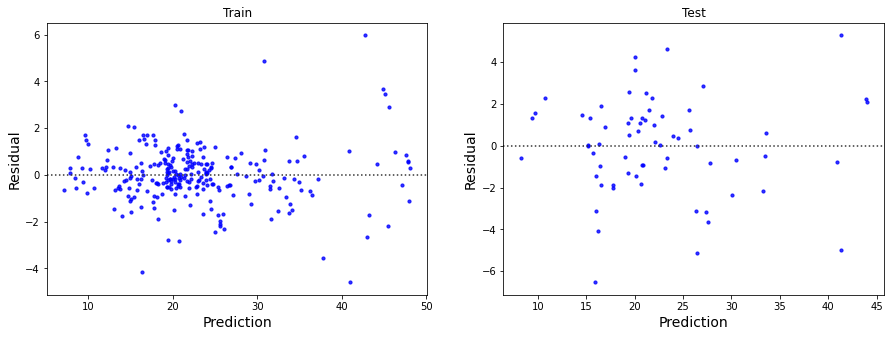

In [33]:
plot_residual(X_train, y_train, X_test, y_test, model)

`The data spread out pretty well. But, it still can be improved by using transform with yeo-johnson`

## Error Checking

In [34]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,pred,actual,error
ID,,,,,,,,,,,,,,,,
162,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,41.282727,50.0,8.717273
491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,15.894545,8.1,7.794545
167,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,43.850000,50.0,6.150000
164,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,43.966364,50.0,6.033636
428,37.66190,0.0,18.10,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,16.188182,10.9,5.288182
214,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,23.352727,28.1,4.747273
302,0.03537,34.0,6.09,0,0.433,6.590,40.4,5.4917,7,329,16.1,395.75,9.50,26.419091,22.0,4.419091
435,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666,20.2,100.63,15.17,16.040909,11.7,4.340909
168,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403,14.7,227.61,12.14,20.056364,23.8,3.743636


`There is no significant error values to handled`

# 10. Summary Result

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.9795318949691478
R2 Test : 0.9201643345903876
MAE Train : 0.9011619958988378
MAE Test : 1.9759837177747632
MSE Train : 1.6848185795066162
MSE Test : 7.185080769705202
RMSE Train : 1.2980056161306146
RMSE Test : 2.680500096941838


# 11. Save the Model

In [37]:
save_model(model.best_estimator_, "The_Boston_Housing_Price_Prediction_Random_Forest.pkl")

Model is pickled as model/The_Boston_Housing_Price_Prediction_Random_Forest.pkl


____

# Try to Binning Feature

In [38]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  b        333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.1 KB


## 1. Binning tax Column

In [40]:
df['tax'] = pd.cut(df.tax, bins = np.arange(100, 750, 125), labels = ['Low', 'Medium Low', 'Medium', 'Medium High', 'High'])

In [41]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,Medium Low,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,Medium Low,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,Low,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,Low,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,Medium Low,15.2,395.60,12.43,22.9


## 2. Dataset Splitting

In [42]:
X = df.drop(columns="medv")
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

## 3. Modeling

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.impute import SimpleImputer

In [44]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas', 'tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__max_depth': 59, 'algo__max_features': 0.9411525976057389, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 115}
0.9774314991408517 0.837955448944878 0.9206033963980285


## 4. Feature Importance

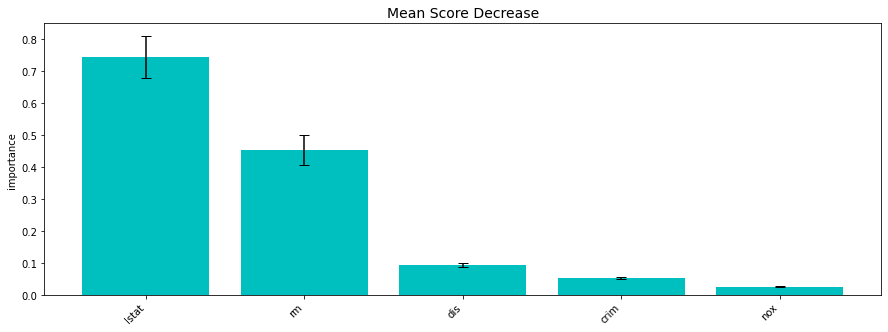

In [45]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=5)

In [46]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['lstat', 'rm', 'dis', 'crim', 'nox'])])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__max_depth': 55, 'algo__max_features': 0.8184656610700978, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 107}
0.9796193402494705 0.8324347693583862 0.9135321373822549


`So Feature Importance is decreased test scores more than models that don't. Thus, I'll keep take all of columns`

## 5. Polynomial Feature

In [47]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=3), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas', 'tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.rf_poly_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__max_depth': 46, 'algo__max_features': 0.49095492895938586, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 127, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.9809843399692928 0.8493937511594123 0.8905744585598676


`Polynomial feature has decreased test scores more than models that don't`

## 6. Fine Tuning

In [48]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(transform = 'yeo-johnson'), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas', 'tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])


parameter = {'algo__n_estimators': Integer(low=100, high=250),
             'algo__max_depth': Integer(low=20, high=80),
             'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
             'algo__min_samples_leaf': Integer(low=1, high=20)}

model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__max_depth': 59, 'algo__max_features': 0.9411525976057389, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 115}
0.9772230104741257 0.8365655656095539 0.922514633017369


## 7. Evaluation 

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


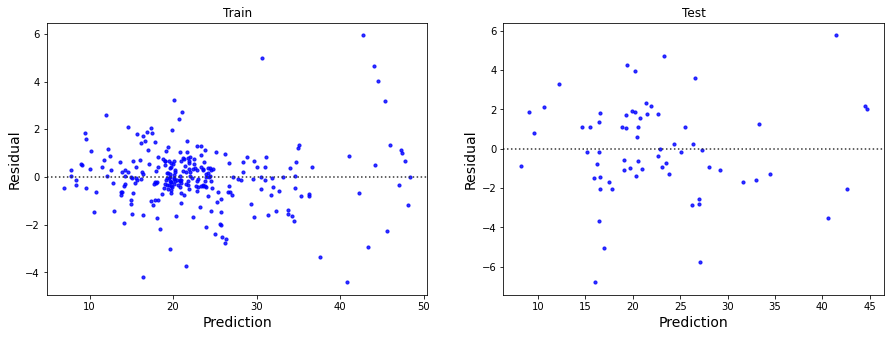

In [49]:
plot_residual(X_train, y_train, X_test, y_test, model)

### Error Checking

In [50]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error').head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,pred,actual,error
ID,,,,,,,,,,,,,,,,
266,0.76162,20.0,3.97,0,0.6470,5.560,62.8,1.9865,5,Medium Low,13.0,392.40,10.45,22.845217,22.8,0.045217
65,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,Low,18.6,393.24,8.05,33.052174,33.0,0.052174
150,2.73397,0.0,19.58,0,0.8710,5.597,94.9,1.5257,5,Medium,14.7,351.85,21.45,15.492174,15.4,0.092174
272,0.16211,20.0,6.96,0,0.4640,6.240,16.3,4.4290,3,Low,18.6,396.90,6.59,25.053913,25.2,0.146087
195,0.01439,60.0,2.93,0,0.4010,6.604,18.8,6.2196,1,Medium Low,15.6,376.70,4.38,29.251304,29.1,0.151304
408,11.95110,0.0,18.10,0,0.6590,5.608,100.0,1.2852,24,High,20.2,332.09,12.13,28.068696,27.9,0.168696
24,0.98843,0.0,8.14,0,0.5380,5.813,100.0,4.0952,4,Medium Low,21.0,394.54,19.88,14.682609,14.5,0.182609
485,2.37857,0.0,18.10,0,0.5830,5.871,41.9,3.7240,24,High,20.2,370.73,13.34,20.409565,20.6,0.190435
445,12.80230,0.0,18.10,0,0.7400,5.854,96.6,1.8956,24,High,20.2,240.52,23.79,10.600000,10.8,0.200000


## 8. Summary Result

In [51]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.9772230104741257
R2 Test : 0.9225146330173689
MAE Train : 0.9288133376920551
MAE Test : 1.8940038935755992
MSE Train : 1.8748728854271786
MSE Test : 6.973557712383264
RMSE Train : 1.369259977296926
RMSE Test : 2.640749460358416


`So binning feature can help to increse the model performance.`

## 9. Save Model

In [52]:
save_model(model.best_estimator_, "The_Boston_Housing_Price_Prediction_Random_Forest_with_Binning.pkl")

Model is pickled as model/The_Boston_Housing_Price_Prediction_Random_Forest_with_Binning.pkl
